### Flow of work
1. Install packages
2. Data cleaning
3. Word Embedding methods (BoW, TF-IDF)
4. Streamlit app

In [2]:
# install packages
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as pk
import seaborn as sns

In [5]:
df = pd.read_csv('https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/master/IMDB-Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
# preprocessing

df['review'] = df['review'].apply(lambda x: pk.cont_exp(x)) #you're -> you are; i'm -> i am


In [7]:
# get word counts
df['word_counts']  = df['review'].apply(lambda x: pk.get_wordcounts(x)) #count number of words

In [8]:
# get character counts
df['char_counts']  = df['review'].apply(lambda x: pk.get_charcounts(x)) #count number of characters

# get average word length
df['avg_wordlength']  = df['review'].apply(lambda x: pk.get_avg_wordlength(x)) #average word length

# get stopwords count
df['stopwords_counts']  = df['review'].apply(lambda x: pk.get_stopwords_counts(x)) #count number of stopwords


In [9]:
# REMOVE HTML TAGS
df['review'] = df['review'].apply(lambda x: pk.remove_html_tags(x))

# convert reviews to lowercase
df['review'] = df['review'].str.lower()

c:\Users\User\anaconda3\envs\sentiment\Lib\site-packages\preprocess_kgptalkie\utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [10]:
df['reviews_without_stopwords'] = df['review'].apply(lambda x: pk.remove_stopwords(x))

In [11]:
df

,review,sentiment,word_counts,char_counts,avg_wordlength,stopwords_counts,reviews_without_stopwords
0,one of the other reviewers has mentioned that ...,positive,309,1455,4.708738,139,reviewers mentioned watching 1 oz episode you'...
1,a wonderful little production. the filming tec...,positive,162,837,5.166667,71,wonderful little production. filming technique...
2,i thought this was a wonderful way to spend ti...,positive,166,761,4.584337,81,thought wonderful way spend time hot summer we...
3,basically there is a family where a little boy...,negative,140,611,4.364286,67,basically family little boy (jake) thinks zomb...
4,"petter mattei's ""love in the time of money"" is...",positive,230,1088,4.730435,107,"petter mattei's ""love time money"" visually stu..."
...,...,...,...,...,...,...,...
49995,i thought this movie did a down right good job...,positive,198,815,4.116162,116,thought movie right good job. creative origina...
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative,112,531,4.741071,49,"bad plot, bad dialogue, bad acting, idiotic di..."
49997,i am a catholic taught in parochial elementary...,negative,231,1051,4.549784,119,catholic taught parochial elementary schools n...
49998,i'm going to have to disagree with the previou...,negative,213,1023,4.802817,106,i'm going disagree previous comment maltin one...


c:\Users\User\anaconda3\envs\sentiment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\sentiment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\sentiment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\sentiment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

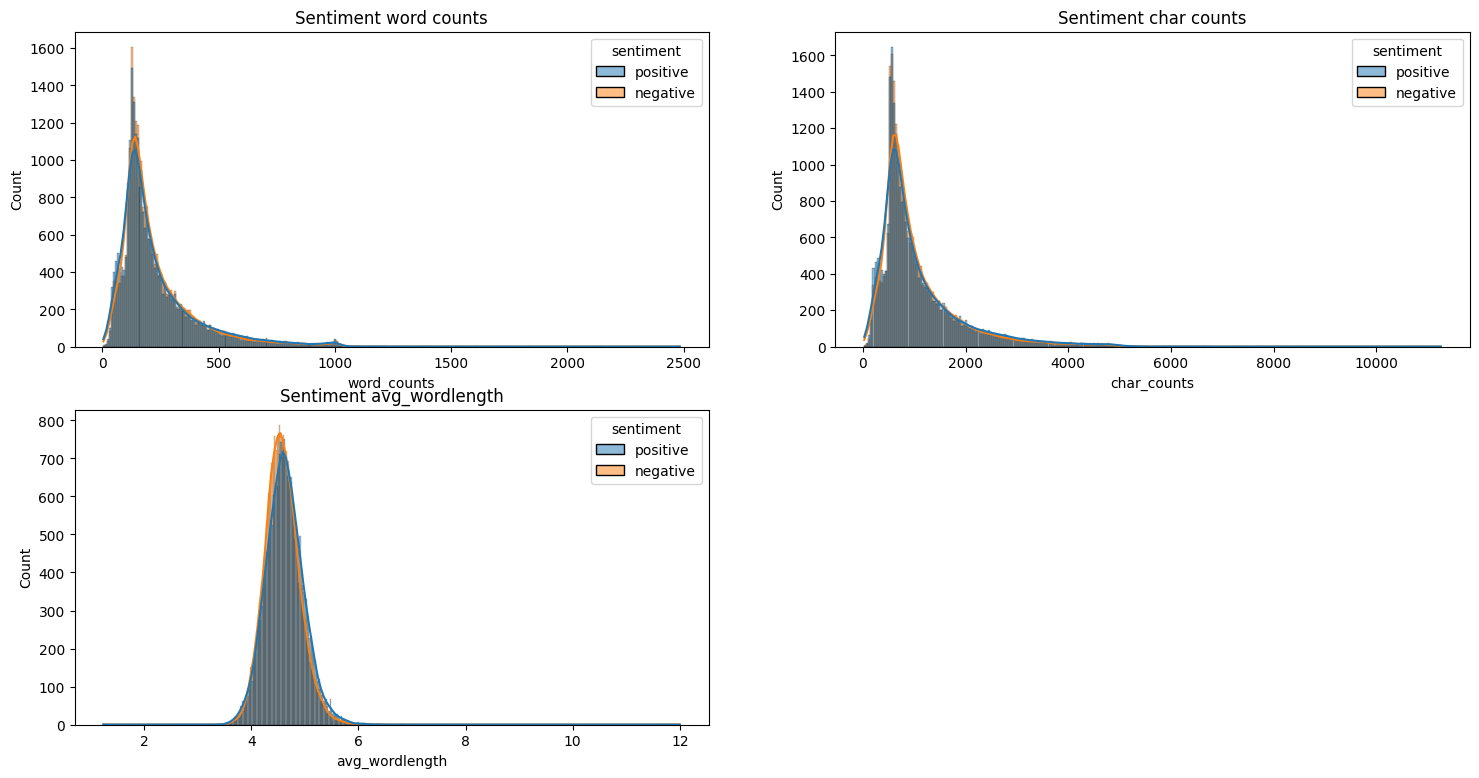

In [12]:
import warnings

#  Suppress Matplotlib warnings
warnings.filterwarnings("ignore", category=UserWarning)

# plot word counts
plt.figure(figsize=(18,9))

plt.subplot(2,2,1)
# sns.barplot(x = 'sentiment', y = 'word_counts', data = df)
sns.histplot(x = 'word_counts', data = df, hue = 'sentiment', kde = True)
plt.title('Sentiment word counts')

plt.subplot(2,2,2)
# sns.barplot(x = 'sentiment', y = 'word_counts', data = df)
sns.histplot(x = 'char_counts', data = df, hue = 'sentiment', kde = True)
plt.title('Sentiment char counts')

plt.subplot(2,2,3)
# sns.barplot(x = 'sentiment', y = 'word_counts', data = df)
sns.histplot(x = 'avg_wordlength', data = df, hue = 'sentiment', kde = True)
plt.title('Sentiment avg_wordlength')

plt.show()
# warnings.resetwarnings()

In [13]:
# model building
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [14]:
X_train,X_test,y_train,y_test = train_test_split(df['reviews_without_stopwords'], df['sentiment'], test_size = 0.2, random_state = 42, stratify=df['sentiment'])

X_train.shape

(40000,)

In [16]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [17]:
clf.fit(X_train, y_train)

c:\Users\User\anaconda3\envs\sentiment\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

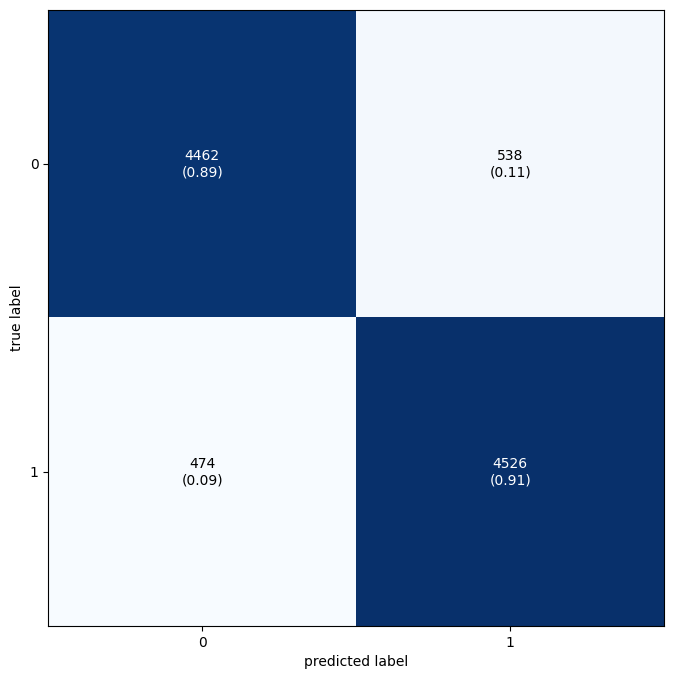

In [20]:
from mlxtend.plotting import plot_confusion_matrix

conMat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = conMat, figsize = (8,8), show_normed = True)

In [21]:
# store the model
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf2 = Pipeline([('tfidf', TfidfVectorizer()), ('clf2', RandomForestClassifier())])




In [25]:
clf2.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf2', RandomForestClassifier())])

              precision    recall  f1-score   support

    negative       0.86      0.87      0.86      5000
    positive       0.87      0.85      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



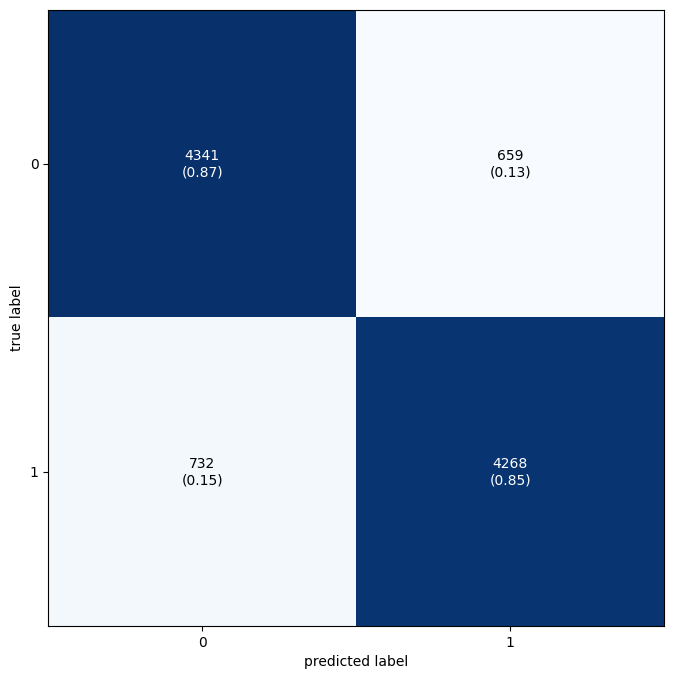

In [26]:

y_pred2 = clf2.predict(X_test)

print(classification_report(y_test, y_pred2))

conMat2 = confusion_matrix(y_test, y_pred2)

plot_confusion_matrix(conf_mat = conMat2, figsize = (8,8), show_normed = True)

pickle.dump(clf2, open('model2.pkl', 'wb'))